# 10. Random Forest Regression Model Performance Under Different Feature Selection Techniques

By directly calling the existing learning curve function, we can quickly see whether the three different feature selection methods will have a significant impact on the performance of the random forest model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

df_y2= pd.read_csv('../data/processed/merged_data_Y2.csv')
df_y3 = pd.read_csv('../data/processed/merged_data_Y3.csv')
df_y2

,MemberID,AgeAtFirstClaim,Male,Female,Unknown,ClaimsCount,Unique_ProviderID,Unique_Vendor,Unique_PCP,PayDelay,...,3- 4 months,4- 5 months,5- 6 months,6- 7 months,7- 8 months,8- 9 months,9-10 months,DrugCount,LabCount,DaysInHospital
0,210,35.0,0.0,0.0,1.0,6.0,3.0,3.0,1.0,308.0,...,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,3197,5.0,0.0,1.0,0.0,5.0,4.0,3.0,1.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0
2,11951,15.0,0.0,1.0,0.0,11.0,8.0,8.0,1.0,608.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
3,14661,5.0,0.0,0.0,1.0,12.0,4.0,4.0,1.0,637.0,...,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,5.0,0
4,14778,35.0,0.0,1.0,0.0,8.0,6.0,5.0,2.0,320.0,...,5.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51961,99971678,65.0,0.0,1.0,0.0,16.0,5.0,4.0,1.0,553.0,...,3.0,1.0,0.0,0.0,3.0,0.0,0.0,10.0,13.0,0
51962,99973127,80.0,0.0,0.0,1.0,14.0,6.0,4.0,1.0,1081.0,...,1.0,0.0,0.0,4.0,0.0,0.0,1.0,22.0,5.0,0
51963,99976647,15.0,1.0,0.0,0.0,4.0,3.0,3.0,1.0,115.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0
51964,99977491,65.0,0.0,1.0,0.0,6.0,2.0,2.0,1.0,235.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0


In [2]:
# From joint feature selection: 
#  - numerical data--correlation coefficient method + categorical data--mutual information value (40 features)
feature_combination1 = ['ClaimsCount', 'PayDelay', 'Unique_ProviderID', 'MED', 'EM', 'SCS', 'RAD', 'ANES', 'SDS', 'PL', 'SIS', 'SMS', 'SGS', 'SEOA', 'SNS',
 'SAS', 'SRS', 'SUS', 'SO', 'SMCD', 'Office', 'Independent Lab', 'Outpatient Hospital', 'Inpatient Hospital',
 'Urgent Care', 'Ambulance', 'Home', 'Other_y', 'Surgery', 'Internal', 'Laboratory', 'Pediatrics', 'Rehabilitation','Diagnostic Imaging', 'Anesthesiology', 'Emergency', 
        'General Practice', 'Other_x', 'Obstetrics and Gynecology', 'Pathology']
feature_combination1_y2 = df_y2[feature_combination1]
label_y2 = df_y2['DaysInHospital']

feature_combination1_y3 = df_y3[feature_combination1]
label_y3 = df_y3['DaysInHospital']


In [3]:
feature_combination1_y2

,ClaimsCount,PayDelay,Unique_ProviderID,MED,EM,SCS,RAD,ANES,SDS,PL,...,Laboratory,Pediatrics,Rehabilitation,Diagnostic Imaging,Anesthesiology,Emergency,General Practice,Other_x,Obstetrics and Gynecology,Pathology
0,6.0,308.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
1,5.0,148.0,4.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.0,608.0,8.0,0.0,3.0,1.0,4.0,0.0,1.0,1.0,...,2.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0
3,12.0,637.0,4.0,3.0,3.0,2.0,1.0,0.0,0.0,3.0,...,2.0,5.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
4,8.0,320.0,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51961,16.0,553.0,5.0,3.0,7.0,1.0,0.0,0.0,0.0,5.0,...,6.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0
51962,14.0,1081.0,6.0,2.0,5.0,2.0,1.0,0.0,0.0,3.0,...,1.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0
51963,4.0,115.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
51964,6.0,235.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
label_y3

0        0
1        0
2        0
3        2
4        0
        ..
49677    0
49678    0
49679    0
49680    0
49681    0
Name: DaysInHospital, Length: 49682, dtype: int64

In [5]:
# From recursive feature elimination
# - the most useful features are selected by recursively building a linear regression model. (33 features)
feature_combination2 = ['ClaimsCount', 'Diagnostic Imaging', 'Emergency', 'Pathology',
       'Ambulance', 'Home', 'Inpatient Hospital', 'Office', 'Other_y',
       'Outpatient Hospital', 'Urgent Care', 'APPCHOL', 'CANCRM', 'CATAST',
       'LIVERDZ', 'PERINTL', 'PERVALV', 'PNCRDZ', 'RENAL1', 'SEPSIS', 'STROKE',
       '0', '1-2', '3-4', '5+', 'ANES', 'PL', 'SAS', 'SCS', 'SDS', 'SMCD',
       'SMS', 'SO']

feature_combination2_y2 = df_y2[feature_combination2]
feature_combination2_y3 = df_y3[feature_combination2]

In [6]:
feature_combination2_y2

,ClaimsCount,Diagnostic Imaging,Emergency,Pathology,Ambulance,Home,Inpatient Hospital,Office,Other_y,Outpatient Hospital,...,3-4,5+,ANES,PL,SAS,SCS,SDS,SMCD,SMS,SO
0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,11.0,3.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,12.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0
4,8.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51961,16.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0
51962,14.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0
51963,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
51964,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mean Squared Error on Year 3 data: 0.6262261292671005


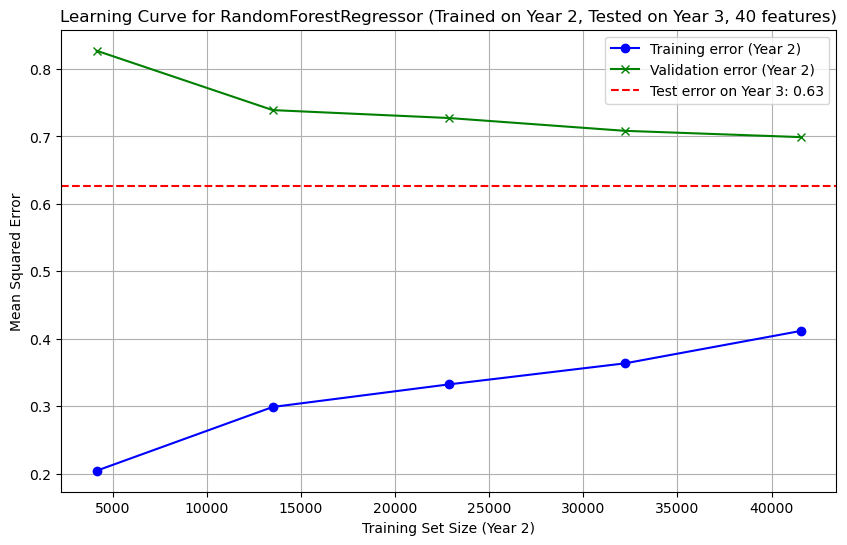

In [7]:
# Set the optimal hyperparameters for the model
final_model = RandomForestRegressor(n_estimators=180, max_depth=9, random_state=42, n_jobs=-1)

# Use learning_curve to generate a learning curve on the training data
train_sizes, train_scores, test_scores = learning_curve(
    final_model, feature_combination1_y2, label_y2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate the mean square error on the training set and the validation set
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training error (Year 2)", color="blue", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation error (Year 2)", color="green", marker='x')

# Use the second year's data to train the model and make predictions on the third year's data
final_model.fit(feature_combination1_y2, label_y2)
y_pred_y3 = final_model.predict(feature_combination1_y3)

# Calculate the mean square error on the third year's data
mse_y3 = mean_squared_error(label_y3, y_pred_y3)
print(f"Mean Squared Error on Year 3 data: {mse_y3}")

# Mark the error of the third year's data on the graph as the performance of the model on "unknown data"
plt.axhline(y=mse_y3, color='red', linestyle='--', label=f"Test error on Year 3: {mse_y3:.2f}")

# Add title and labels
plt.title("Learning Curve for RandomForestRegressor (Trained on Year 2, Tested on Year 3, 40 features)")
plt.xlabel("Training Set Size (Year 2)")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Mean Squared Error on Year 3 data: 0.638663232851971


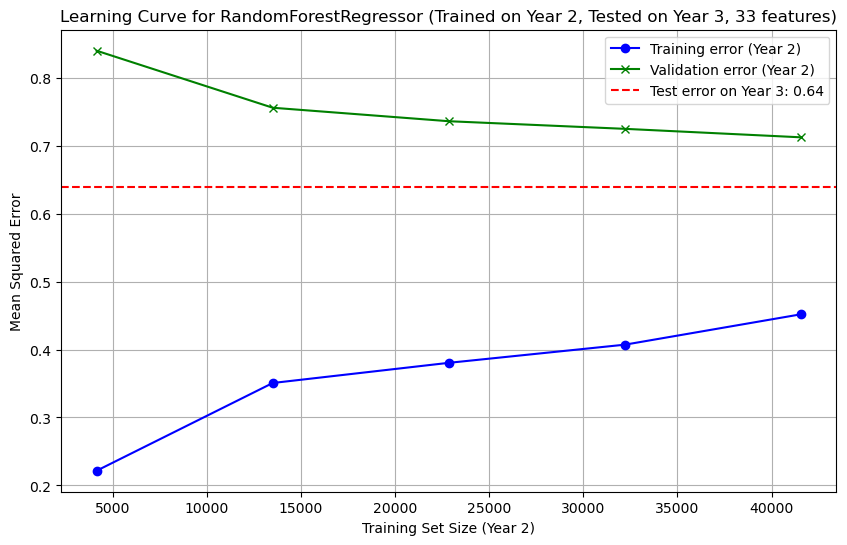

In [8]:
# Setting the optimal hyperparameters for the model
final_model = RandomForestRegressor(n_estimators=180, max_depth=9, random_state=42, n_jobs=-1)

# Use learning_curve to generate a learning curve on the training data
train_sizes, train_scores, test_scores = learning_curve(
    final_model, feature_combination2_y2, label_y2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate the mean square error on the training set and the validation set
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training error (Year 2)", color="blue", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation error (Year 2)", color="green", marker='x')

# Use the second year's data to train the model and make predictions on the third year's data
final_model.fit(feature_combination2_y2, label_y2)
y_pred_y3 = final_model.predict(feature_combination2_y3)

# Calculate the mean square error on the third year's data
mse_y3 = mean_squared_error(label_y3, y_pred_y3)
print(f"Mean Squared Error on Year 3 data: {mse_y3}")

# Mark the error of the third year's data on the graph as the performance of the model on "unknown data"
plt.axhline(y=mse_y3, color='red', linestyle='--', label=f"Test error on Year 3: {mse_y3:.2f}")

# Add title and labels
plt.title("Learning Curve for RandomForestRegressor (Trained on Year 2, Tested on Year 3, 33 features)")
plt.xlabel("Training Set Size (Year 2)")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [9]:
# From the embedding method
# - based on the random forest model is used to automatically handle mixed feature types 
# and give the importance of features. (27 features)

df_y2 = pd.read_csv('../data/train_test/rf_data_Y2.csv')
df_y3 = pd.read_csv('../data/train_test/rf_data_Y3.csv')
# get features and label from the the data
X_y2 = df_y2.drop(['DaysInHospital'], axis=1)
y_y2 = df_y2['DaysInHospital']

X_y3 = df_y3.drop(['DaysInHospital'], axis=1)
y_y3 = df_y3['DaysInHospital'] 

Mean Squared Error on Year 3 data: 0.6451144060082579


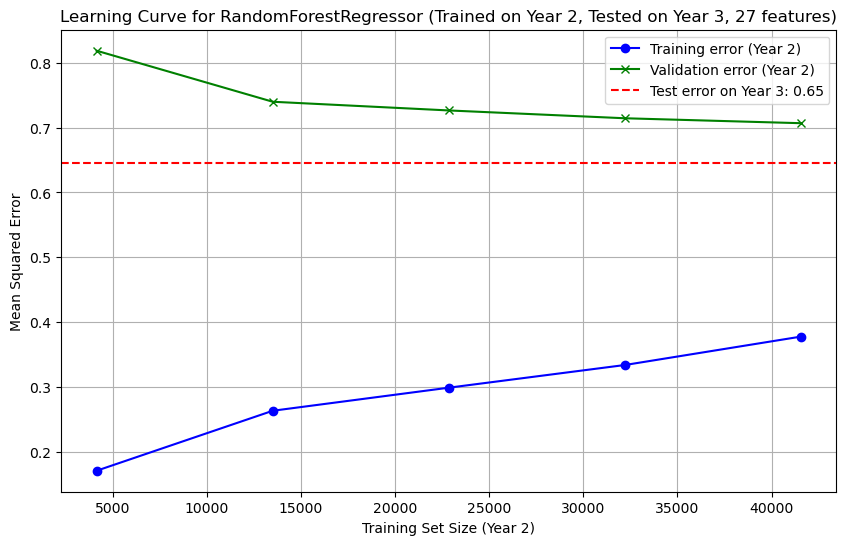

In [10]:
# Set the optimal hyperparameters for the model
final_model = RandomForestRegressor(n_estimators=180, max_depth=9, random_state=42, n_jobs=-1)

# Use learning_curve to generate a learning curve on the training data
train_sizes, train_scores, test_scores = learning_curve(
    final_model, X_y2, y_y2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate the mean square error on the training set and the validation set
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training error (Year 2)", color="blue", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation error (Year 2)", color="green", marker='x')

# Use the second year's data to train the model and make predictions on the third year's data
final_model.fit(X_y2, y_y2)
y_pred_y3 = final_model.predict(X_y3)

# Calculate the mean square error on the third year's data
mse_y3 = mean_squared_error(y_y3, y_pred_y3)
print(f"Mean Squared Error on Year 3 data: {mse_y3}")

# Mark the error of the third year's data on the graph as the performance of the model on unknown data
plt.axhline(y=mse_y3, color='red', linestyle='--', label=f"Test error on Year 3: {mse_y3:.2f}")

# Add title and labels
plt.title("Learning Curve for RandomForestRegressor (Trained on Year 2, Tested on Year 3, 27 features)")
plt.xlabel("Training Set Size (Year 2)")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()